In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- *pandas* digunakan untuk manipulasi data berbentuk tabel (dataframe)

- *matplotlib.pyplot* dan seaborn untuk membuat grafik dan visualisasi data
- *numpy* untuk operasi matematika dan array yang lebih efisien.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/KULIAH/DATASET UAS BENGKOD /ObesityDataSet (1).csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Menampilkan Dataset

In [4]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(path)

In [5]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


fungsi head() dari dataframe df untuk menampilkan 5 baris pertama data dalam dataset.

In [6]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


fungsi tail() dari dataframe df untuk menampilkan 5 baris terakhir data dalam dataset.

In [7]:
# Ubah kolom-kolom numerik menjadi tipe float/int (jika masih object)
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

## EDA (EXPLORATORY DATA ANALYSIS)

In [8]:
# Informasi umum dataset
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF                             20

Bagian kode ini mengecek apakah ada nilai kosong (missing values) dalam dataset menggunakan fungsi df.isnull().sum(). Fungsi ini menghitung jumlah nilai kosong di setiap kolom.
- terdapat 2111 data dgn 17 kolom, dan terdapat banyak missing values

In [9]:
# deskripsi statistik fitur numerik
desc = df.describe()
desc

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


Kode ini menampilkan ringkasan statistik deskriptif dari dataframe df dengan menggunakan fungsi df.describe(). Statistik yang ditampilkan meliputi jumlah data (count), nilai unik, nilak maks, dan modus


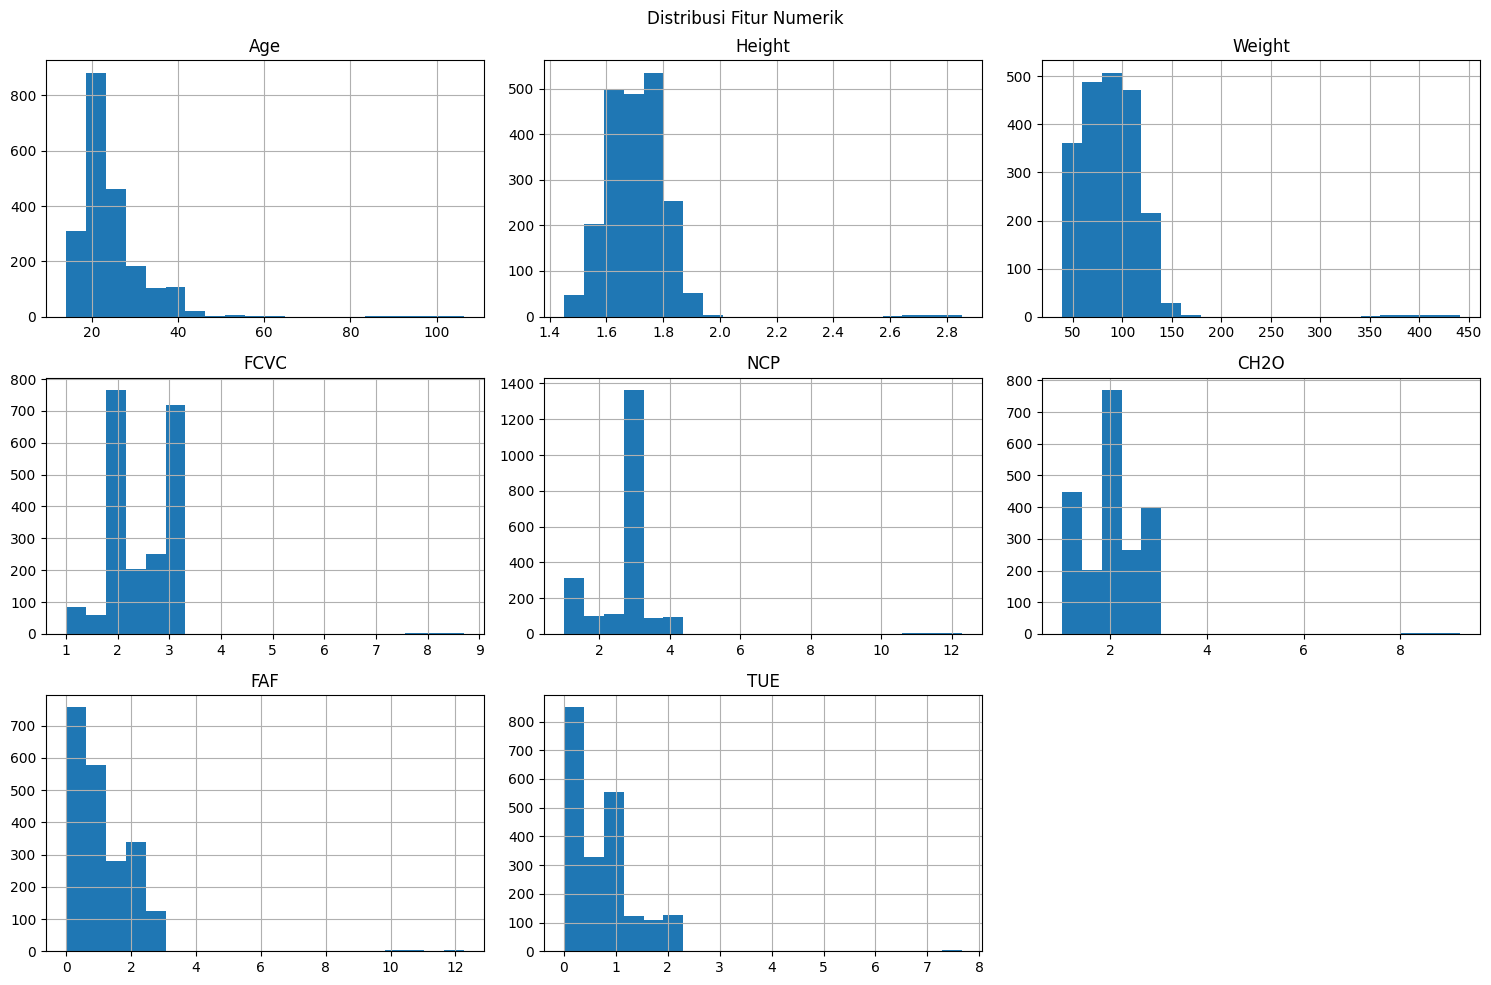

In [10]:
# VISUALISASI DATA
# Plot histogram
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()

In [11]:
# cek nilai unik per kolom
unique_values = df.nunique()
unique_values

,0
Age,1393
Gender,3
Height,1561
Weight,1517
CALC,5
FAVC,3
FCVC,807
NCP,636
SCC,3
SMOKE,3


In [12]:
df.columns = df.columns.str.strip()
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [13]:
# Cek missing values
missing_values = df.isnull().sum()
missing_values

,0
Age,22
Gender,9
Height,22
Weight,19
CALC,5
FAVC,11
FCVC,18
NCP,22
SCC,10
SMOKE,5


In [14]:
# Cek data duplikat

print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
18


In [15]:
# Distribusi data target
target_dist = df['NObeyesdad'].value_counts()
target_dist

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [16]:
# cek keseimbangan data

print("\nDistribusi label:")
print(df["NObeyesdad"].value_counts(normalize=True))


Distribusi label:
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


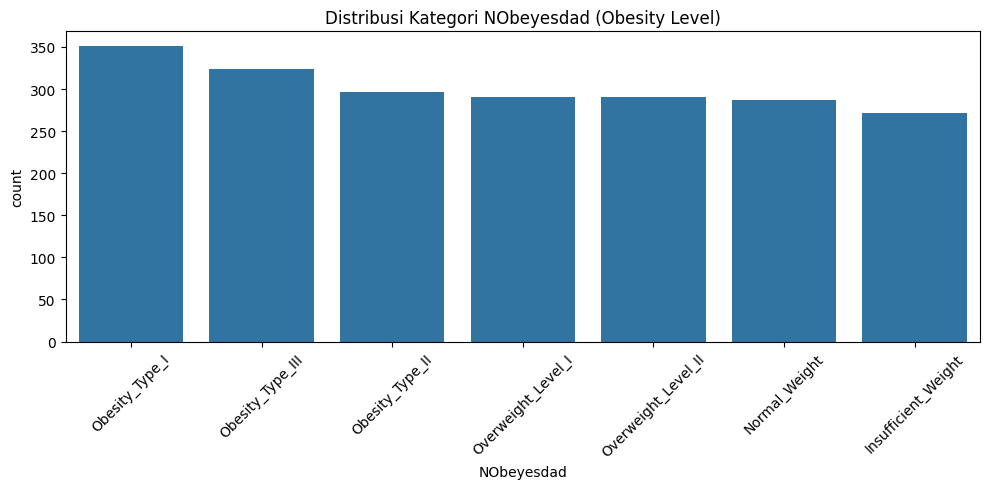

In [17]:
# Visualisasi distribusi target
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kategori NObeyesdad (Obesity Level)')
plt.tight_layout()
plt.show()

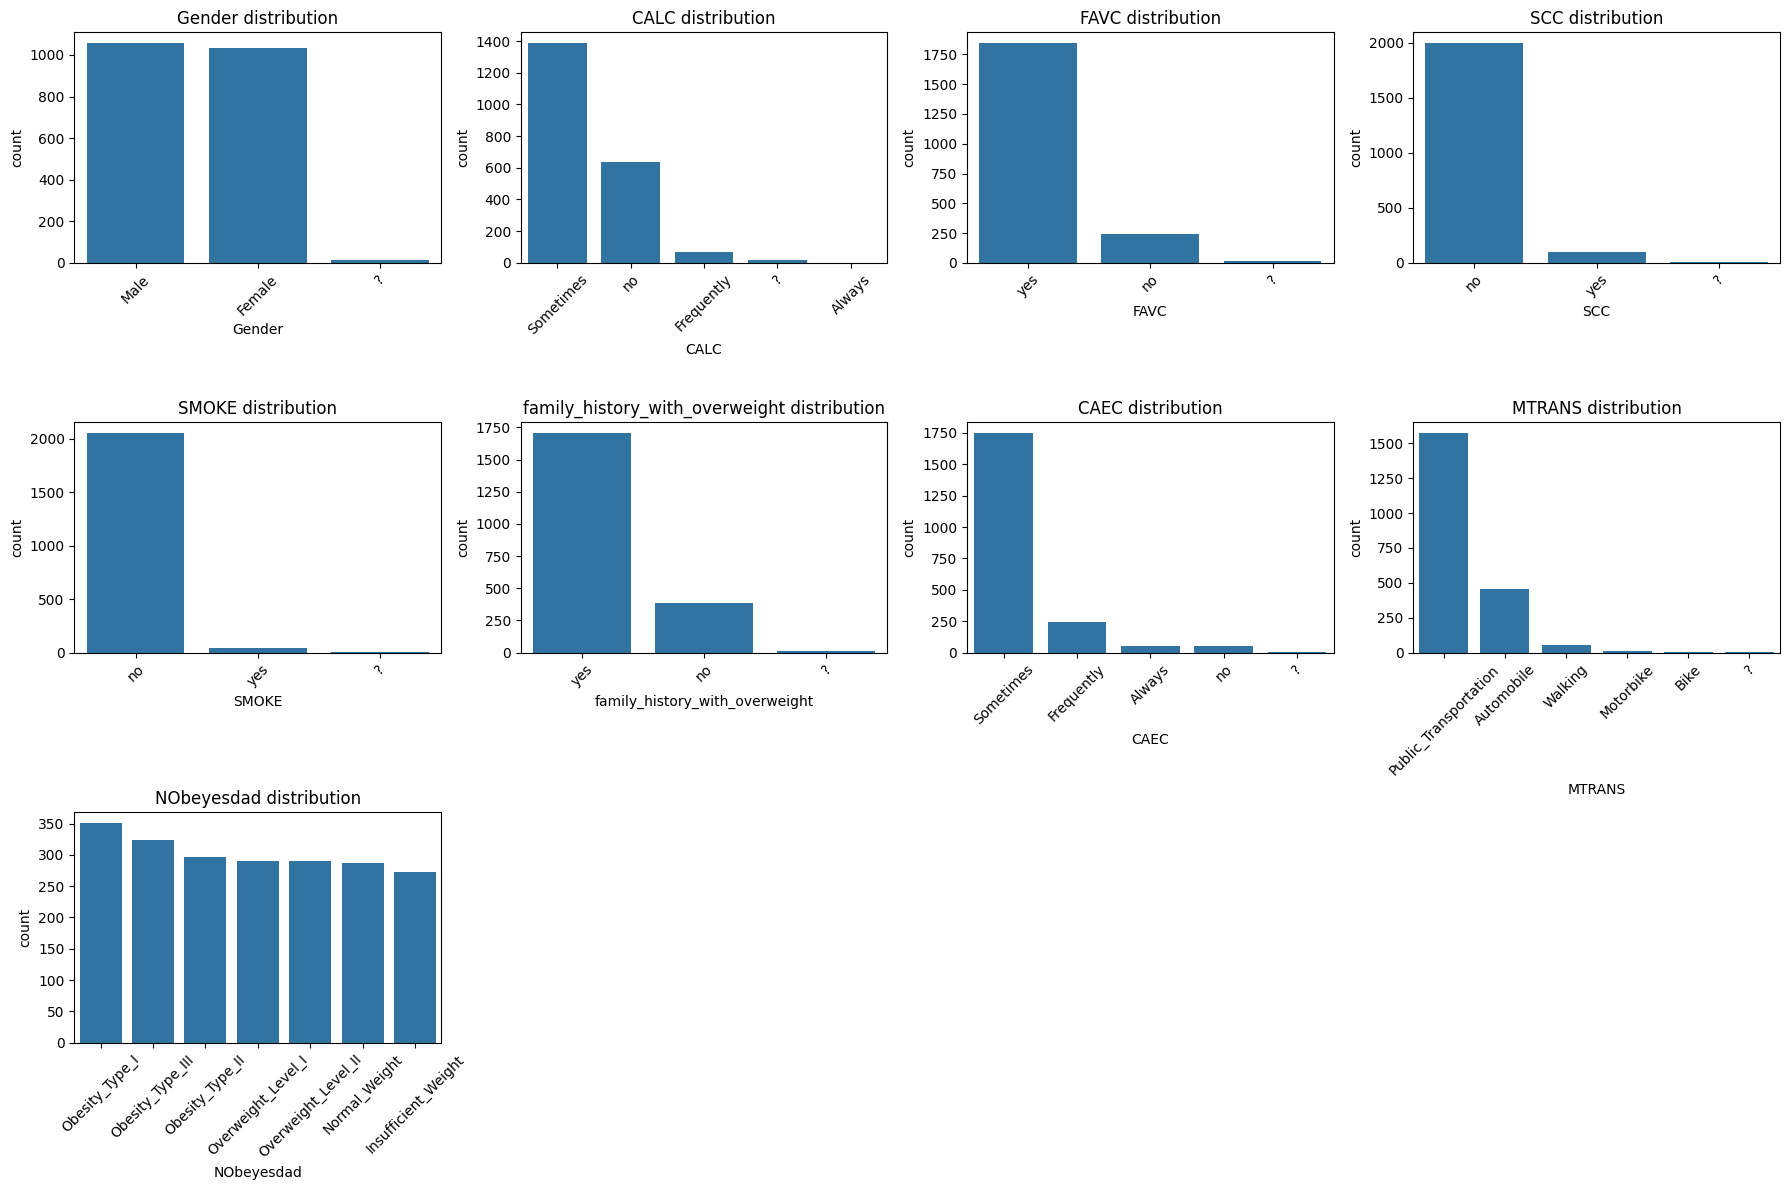

In [18]:
# Hanya plot kolom yang kategorikal dengan jumlah kategori <= 20
cat_cols = [c for c in df.select_dtypes('object').columns
            if df[c].nunique() <= 20]

n = len(cat_cols)
n_cols = 4
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=df, x=col, ax=ax,
                  order=df[col].value_counts().index)
    ax.set_title(f'{col} distribution')
    ax.tick_params(axis='x', rotation=45)

# Hapus sumbu kosong
for ax in axes.flatten()[n:]:
    ax.remove()

plt.tight_layout()
plt.show()

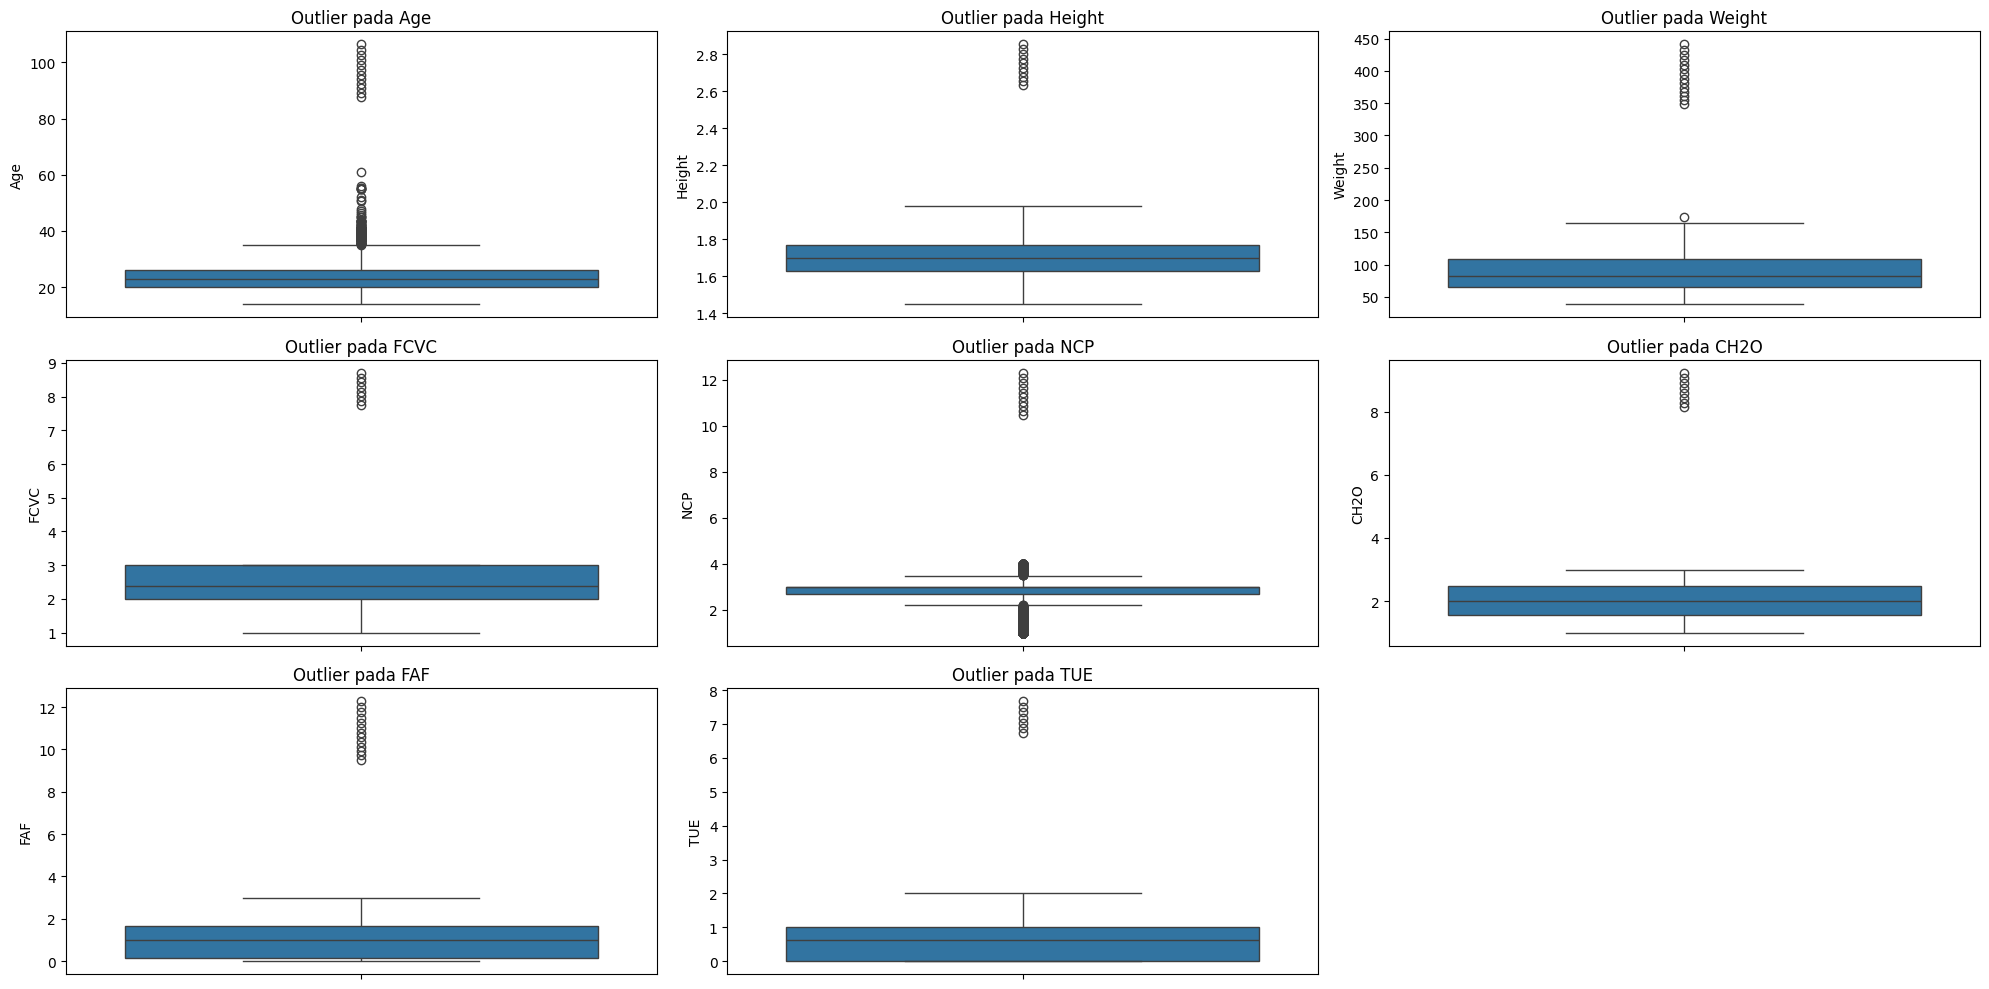

In [19]:
# deteksi outlier
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()